<a href="https://colab.research.google.com/github/HanifRafandi014/3D_Machine_Learning/blob/main/TA_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Recognition with CNN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Library**

In [ ]:
import keras
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import save_model, load_model

**Training Dataset Epoch**

In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/Computer Vision/Tugas Akhir OCR/face-dataset/training/"

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=3,
    class_mode="categorical",
)

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax'),
])

class_names = [
    "Aditya Kuncara Bakti",
    "Dandy Wahyu Syahputra",
    "M. Rohmatul Mauludi",
]

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=15, verbose=1)

score = model.evaluate(train_generator)
print(f"Akurasi model: {score[1] * 100:.2f}%")


Found 15 images belonging to 3 classes.
Epoch 1/15
5/5 [==============================] - 6s 1s/step - loss: 5.3875 - accuracy: 0.3333
Epoch 2/15
5/5 [==============================] - 5s 899ms/step - loss: 1.1763 - accuracy: 0.4000
Epoch 3/15
5/5 [==============================] - 4s 699ms/step - loss: 0.8809 - accuracy: 0.4667
Epoch 4/15
5/5 [==============================] - 4s 703ms/step - loss: 0.5640 - accuracy: 0.6667
Epoch 5/15
5/5 [==============================] - 6s 1s/step - loss: 0.4834 - accuracy: 0.6000
Epoch 6/15
5/5 [==============================] - 4s 695ms/step - loss: 0.4902 - accuracy: 0.6667
Epoch 7/15
5/5 [==============================] - 5s 1s/step - loss: 0.4065 - accuracy: 0.6667
Epoch 8/15
5/5 [==============================] - 5s 923ms/step - loss: 0.5572 - accuracy: 0.6667
Epoch 9/15
5/5 [==============================] - 5s 933ms/step - loss: 0.4645 - accuracy: 0.6000
Epoch 10/15
5/5 [==============================] - 4s 706ms/step - loss: 0.3943 - accur

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 186624)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Tugas Akhir OCR/faces.h5')

In [ ]:
def classify_image():
    uploaded = files.upload()

    for fn in uploaded.keys():
        path = fn
        img = image.load_img(path, target_size=(224, 224))

        plt.imshow(img)
        plt.show()

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        # load_faces = load_model('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Tugas Akhir OCR/faces.h5')

        # prediction = load_faces.predict(x)

        prediction = model.predict(x)

        predicted_class = prediction.argmax(axis=1)[0]
        confidence = prediction[0][predicted_class]
        formatted_confidence = "{:.2%}".format(confidence)

        print(f"File: {fn}")
        print(f"Predicted Name: {class_names[predicted_class]}")
        print(f"Confidence: {formatted_confidence}")

**Input Picture dataset**

Saving Screenshot 2023-12-09 120524.png to Screenshot 2023-12-09 120524 (2).png


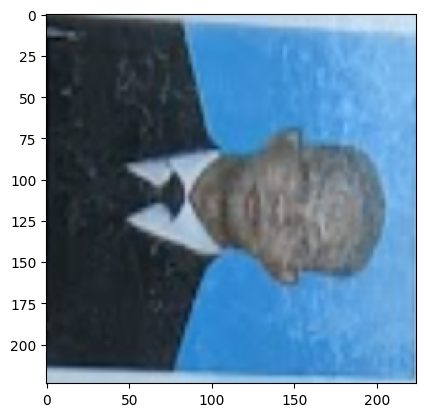

1/1 [==============================] - 0s 117ms/step
File: Screenshot 2023-12-09 120524 (2).png
Predicted Name: M. Rohmatul Mauludi
Confidence: 100.00%


In [ ]:
classify_image()

Saving Screenshot 2023-12-09 120351.png to Screenshot 2023-12-09 120351 (1).png


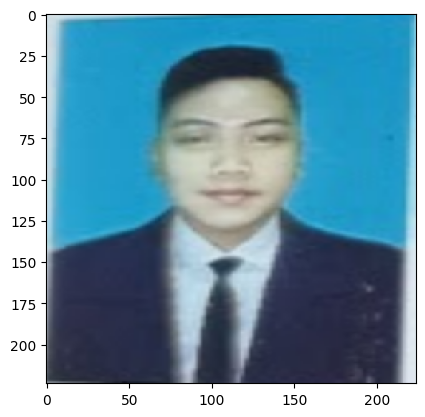

1/1 [==============================] - 0s 111ms/step
File: Screenshot 2023-12-09 120351 (1).png
Predicted Name: M. Rohmatul Mauludi
Confidence: 100.00%


In [ ]:
classify_image()

Saving Screenshot 2023-12-09 120524.png to Screenshot 2023-12-09 120524.png


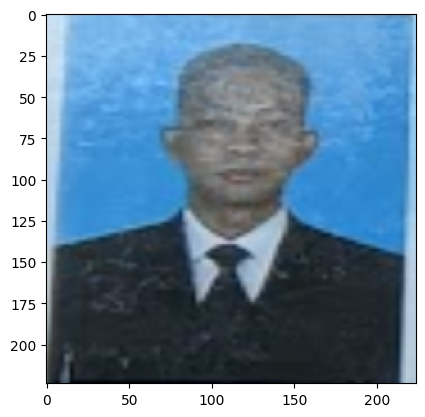

1/1 [==============================] - 0s 31ms/step
File: Screenshot 2023-12-09 120524.png
Predicted Name: Dandy Wahyu Syahputra
Confidence: 100.00%


In [ ]:
classify_image()

Saving Screenshot 2023-12-09 120147.png to Screenshot 2023-12-09 120147.png


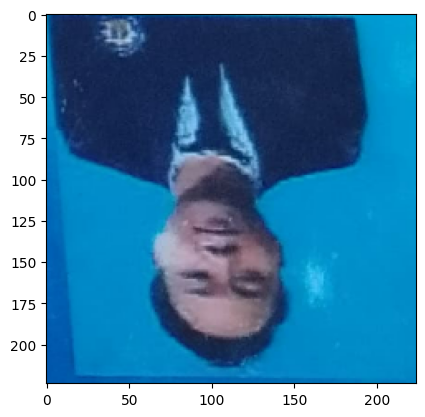

1/1 [==============================] - 0s 34ms/step
File: Screenshot 2023-12-09 120147.png
Predicted Name: Aditya Kuncara Bakti
Confidence: 100.00%


In [ ]:
classify_image()

Saving Screenshot 2023-12-09 120205.png to Screenshot 2023-12-09 120205.png


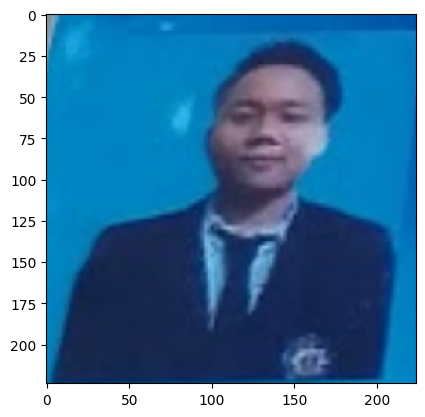

1/1 [==============================] - 0s 30ms/step
File: Screenshot 2023-12-09 120205.png
Predicted Name: Aditya Kuncara Bakti
Confidence: 100.00%


In [ ]:
classify_image()